# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_excel('Arrival_time.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_mass        576 non-null    float64
 1   Standoff_distance  576 non-null    int64  
 2   Time_of_arrival    576 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 13.6 KB


In [3]:
dataset.head()

,Charge_mass,Standoff_distance,Time_of_arrival
0,0.5,1,0.00066
1,0.5,7,0.01583
2,0.5,9,0.02156
3,0.5,11,0.02735
4,0.5,13,0.03318


In [3]:
y = dataset['Time_of_arrival']
X = dataset.drop('Time_of_arrival', axis=1)
print(X.shape, y.shape)

(576, 2) (576,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=4, input_shape=(X_train.shape[1],), activation='leaky_relu'))

### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=5, activation='leaky_relu'))

### Adding the third hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=5, activation='leaky_relu'))

### Adding the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

### what model looks like

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 5)                 25        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Training the ANN

### Compiling the ANN

In [13]:
from tensorflow.keras.optimizers import Adamax
opt = Adamax(learning_rate=0.01)
ann.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae'])

### early stopping callback

In [14]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [15]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=50,
                    verbose=1)

Epoch 1/500
9/9 [==============================] - 1s 21ms/step - loss: 0.1049 - mae: 0.2352 - val_loss: 0.0318 - val_mae: 0.1495
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0163 - mae: 0.1005 - val_loss: 0.0227 - val_mae: 0.1236
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0169 - mae: 0.1040 - val_loss: 0.0105 - val_mae: 0.0859
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0084 - mae: 0.0730 - val_loss: 0.0085 - val_mae: 0.0706
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0707 - val_loss: 0.0067 - val_mae: 0.0690
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0067 - mae: 0.0665 - val_loss: 0.0071 - val_mae: 0.0718
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0060 - mae: 0.0626 - val_loss: 0.0055 - val_mae: 0.0618
Epoch 8/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0565 - va

### Predicting the results of the Test set

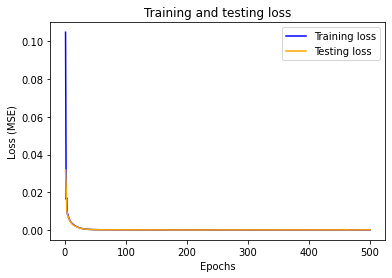

In [16]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

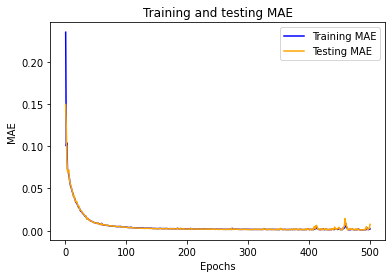

In [17]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Training MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Testing MAE')
plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [18]:
print (epochs)

range(1, 501)


3/3 [==============================] - 0s 1ms/step


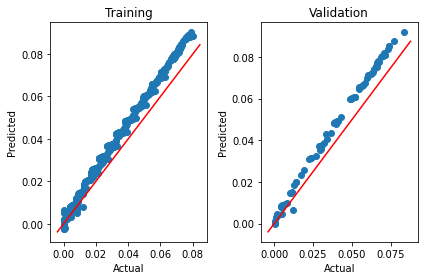

In [19]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [20]:
#X_test=np.asarray(X_test).astype(np.int)

#y_test=np.asarray(y_test).astype(np.int)

y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 3ms/step
[[ 5.97e-02  4.88e-02]
 [ 3.11e-02  2.27e-02]
 [ 9.13e-02  8.11e-02]
 [ 1.88e-03  2.16e-03]
 [ 2.98e-02  2.55e-02]
 [ 4.17e-02  3.49e-02]
 [ 7.31e-02  6.36e-02]
 [ 5.47e-02  4.54e-02]
 [ 4.36e-03  1.72e-03]
 [ 8.97e-02  7.78e-02]
 [ 3.19e-02  2.47e-02]
 [ 4.22e-02  3.58e-02]
 [ 4.82e-02  4.07e-02]
 [ 8.07e-02  6.99e-02]
 [ 8.16e-02  7.22e-02]
 [ 8.86e-03  5.61e-03]
 [ 4.29e-02  3.39e-02]
 [ 1.43e-02  9.17e-03]
 [ 8.21e-02  7.45e-02]
 [ 3.20e-02  2.55e-02]
 [ 3.07e-03  2.31e-03]
 [ 1.74e-02  1.58e-02]
 [ 8.05e-02  6.98e-02]
 [ 7.72e-02  6.59e-02]
 [ 1.09e-02  1.02e-02]
 [ 5.20e-02  4.36e-02]
 [-2.14e-05  2.50e-04]
 [ 4.15e-03  1.65e-03]
 [ 7.15e-02  6.04e-02]
 [ 9.07e-02  7.97e-02]
 [ 4.01e-02  3.31e-02]
 [ 3.08e-02  2.21e-02]
 [ 2.18e-02  1.74e-02]
 [ 6.70e-02  5.73e-02]
 [ 1.18e-02  7.73e-03]
 [ 6.83e-02  5.87e-02]
 [ 6.00e-02  4.94e-02]
 [ 1.65e-02  1.25e-02]
 [ 1.01e-02  8.00e-03]
 [ 2.28e-02  1.88e-02]
 [ 5.51e-02  4.70e-02]
 [ 6.6

Text(0, 0.5, 'Predicted data')

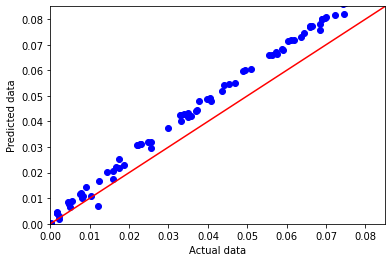

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,0.085],[0,0.085], color = "red")
plt.axis ([0,0.085,0,0.085])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

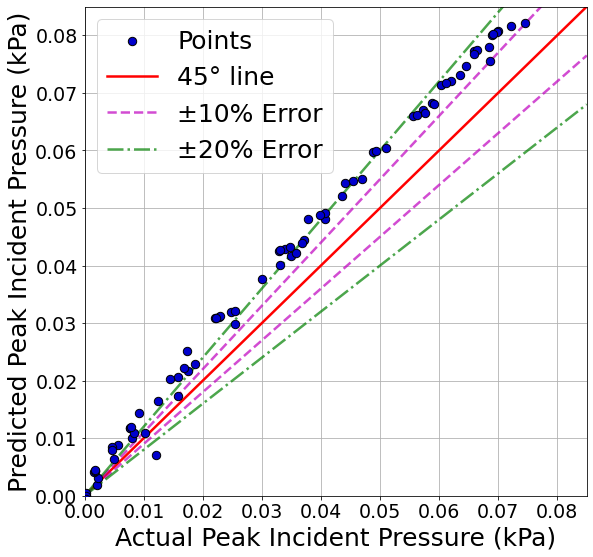

In [22]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,0.085)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 0.085)
plt.xlim(0, 0.085)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [23]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

13/13 [==============================] - 0s 1ms/step
0.006985409608959819
0.0071715251947756424


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9034432557614585


In [25]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.8921028030984669


In [26]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 2.30%
Within 20% margin 47.13%
Out of 20% margin 52.87%


In [27]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9011442856605408


In [28]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.007975134096142068

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.0071715251947756424